In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [60]:
#read csv
df= pd.read_csv('Melbourne_housing_FULL.csv')
print(df)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.

In [61]:
#shape of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [62]:
#summing up the missing values
print("sum")
data=df.isnull().sum().sort_values(ascending=False)
print(data)

sum
BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64


<AxesSubplot:>

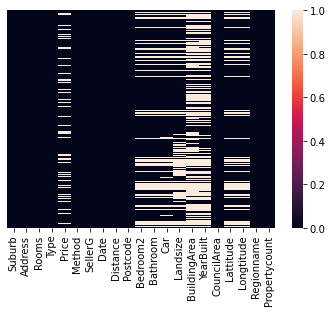

In [63]:
sns.heatmap(df.isnull(), yticklabels=False)

In [64]:
#totally black means dataset is perfect

In [65]:
#data cleaning is nothing but to digest this null data
#missing values row wise
data1=df.isnull().sum(axis=1).sort_values(ascending=False).head(10)
print("row wise max. missing values"," ",data1)

row wise max. missing values   29483    13
18523    11
26888    11
32125     9
11231     9
1696      9
28322     9
1700      9
17635     9
6044      9
dtype: int64


In [66]:
#find the index which has atleast one missing value
data=df.isnull().any()>0
print(data)

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool


In [67]:
print(data.index)
print(data.values)
#those columns which has only true ans.for null value
print("---------",data.index[data.values])

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
[False False False False  True False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True]
--------- Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [68]:
#column having all missing values
data=df.isnull().all(axis=0)
print("in column",data)

in column Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool


In [69]:
#that means there are no such columns having all the values as null
#checking this same for rows

data=df.isnull().all(axis=1).sum()
print("for rows=",data)

for rows= 0


In [70]:
#checking missing values in percentage colimn wise
data=df.isnull().sum().sort_values(ascending=False)/len(df)*100
print("in %",data)
print(round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2))

in % BuildingArea     60.576068
YearBuilt        55.386293
Landsize         33.881286
Car              25.039447
Bathroom         23.599277
Bedroom2         23.573457
Longtitude       22.882061
Lattitude        22.882061
Price            21.832057
Regionname        0.008607
CouncilArea       0.008607
Propertycount     0.008607
Postcode          0.002869
Distance          0.002869
Address           0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Type              0.000000
Rooms             0.000000
Suburb            0.000000
dtype: float64
BuildingArea     60.58
YearBuilt        55.39
Landsize         33.88
Car              25.04
Bathroom         23.60
Bedroom2         23.57
Longtitude       22.88
Lattitude        22.88
Price            21.83
Regionname        0.01
CouncilArea       0.01
Propertycount     0.01
Postcode          0.00
Distance          0.00
Address           0.00
Date              0.00
SellerG           0.00
Method            0.00

In [71]:
#removing columns where the null values percentages

datas=df.isnull().sum().sort_values(ascending=False).head(3).index.values
print(datas)
df1=df.drop(datas,axis='columns')
print(df1)

['BuildingArea' 'YearBuilt' 'Landsize']
           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/0

In [72]:
#checking rows which have more than 5 missing values
data=df1[df1.isnull().sum(axis=1)>5]
print(data)

                  Suburb            Address  Rooms Type  Price Method  \
34            Abbotsford    16b Mollison St      2    h    NaN     PI   
60            Abbotsford  4/328 Johnston St      2    u    NaN     PI   
121         Airport West   2/89 Marshall Rd      3    u    NaN     VB   
207           Alphington   4/5 Chandler Hwy      4    t    NaN     PN   
211           Alphington        11 Tower Av      4    h    NaN      S   
...                  ...                ...    ...  ...    ...    ...   
34769       Surrey Hills       1/4 Wells St      2    u    NaN     SP   
34779  Templestowe Lower     11/231 High St      3    u    NaN     SN   
34792          Thornbury  83/337 Station St      2    u    NaN      S   
34813     Wantirna South   11/61 Cathies La      4    t    NaN      W   
34829     West Melbourne   9/11 Anderson St      3    u    NaN      S   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
34            Biggin  16/07/2016       2.5

In [73]:
#checking in percentage which has more than 5 null values in rows

data=round(len(df1[df1.isnull().sum(axis=1)>5])/len(df1)*100,2)
print(data)

4.94


In [74]:
#retaining the rows having less than or equal to 5 values
df1=df1[df1.isnull().sum(axis=1)<=5]
print(df1)
print(df1.shape)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0       2.0    

In [75]:
#now checking remaining data of null values
data=round(df1.isnull().sum().sort_values(ascending=False)/len(df1)*100,2)
print(data)

Car              21.15
Bathroom         19.63
Bedroom2         19.60
Longtitude       18.88
Lattitude        18.88
Price            17.78
Suburb            0.00
Regionname        0.00
CouncilArea       0.00
Postcode          0.00
Address           0.00
Distance          0.00
Date              0.00
SellerG           0.00
Method            0.00
Type              0.00
Rooms             0.00
Propertycount     0.00
dtype: float64


In [76]:
#by doing this what we found that car, Bathroom, Bedroom2, Longitude,Lattitude and Price still have maximum no. of nukk values 
#so what we do now we just delete those null rows in those columns
data=df1[df1['Car'].notnull()]
print(data)

           Suburb             Address  Rooms Type      Price Method  SellerG  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
...           ...                 ...    ...  ...        ...    ...      ...   
34850     Wollert    15 Rockgarden Wy      3    h        NaN     SP       LJ   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville       29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville      147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  

In [77]:
#updating above operations
df1=data
print(df1)

           Suburb             Address  Rooms Type      Price Method  SellerG  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
...           ...                 ...    ...  ...        ...    ...      ...   
34850     Wollert    15 Rockgarden Wy      3    h        NaN     SP       LJ   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville       29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville      147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  

In [78]:
data=df1[df1['Bedroom2'].notnull()]
print(data)

           Suburb             Address  Rooms Type      Price Method  SellerG  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
...           ...                 ...    ...  ...        ...    ...      ...   
34850     Wollert    15 Rockgarden Wy      3    h        NaN     SP       LJ   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville       29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville      147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  

In [79]:
#assigned it to in original data
df1=data
print(df1.shape)

(26129, 18)


In [80]:
data=df1[df1['Bathroom'].notnull()]
print(data)

           Suburb             Address  Rooms Type      Price Method  SellerG  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
...           ...                 ...    ...  ...        ...    ...      ...   
34850     Wollert    15 Rockgarden Wy      3    h        NaN     SP       LJ   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville       29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville      147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  

In [82]:
#assigned it to in original data
df1=data
print(df1.shape)

(26129, 18)


In [84]:
data=df1[df1['Price'].notnull()]
print(data)

           Suburb           Address  Rooms Type      Price Method  SellerG  \
1      Abbotsford      85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford   25 Bloomburg St      2    h  1035000.0      S   Biggin   
4      Abbotsford      5 Charles St      3    h  1465000.0     SP   Biggin   
5      Abbotsford  40 Federation La      3    h   850000.0     PI   Biggin   
6      Abbotsford       55a Park St      4    h  1600000.0     VB   Nelson   
...           ...               ...    ...  ...        ...    ...      ...   
34849     Wollert   35 Kingscote Wy      3    h   570000.0     SP       RW   
34852  Yarraville       13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville     29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville    147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville  3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car 

In [85]:
#assigned it to in original data
df1=data
print(df1.shape)

(20423, 18)


In [87]:
data=df1.isnull().sum().sort_values(ascending=False)
print(data)

Longtitude       22
Lattitude        22
Suburb            0
Address           0
Regionname        0
CouncilArea       0
Car               0
Bathroom          0
Bedroom2          0
Postcode          0
Distance          0
Date              0
SellerG           0
Method            0
Price             0
Type              0
Rooms             0
Propertycount     0
dtype: int64


In [88]:
#now we have only longitude & latitude columns . which have some null values
#first we will fetch latitude and longitude and later will implement mean value over missing data

data=df1.loc[:,['Lattitude','Longtitude']].describe()
print("LATITUDE AND LONGITUDE",data)

LATITUDE AND LONGITUDE           Lattitude    Longtitude
count  20401.000000  20401.000000
mean     -37.806842    144.997212
std        0.092208      0.120885
min      -38.190430    144.423790
25%      -37.861300    144.924900
50%      -37.799800    145.004500
75%      -37.748000    145.069500
max      -37.397800    145.526350


In [89]:
#replacing it with mean values

data=df1.loc[:,'Lattitude'].fillna(df1['Lattitude'].mean())
print("all rows of that column",data)

all rows of that column 1       -37.79960
2       -37.80790
4       -37.80930
5       -37.79690
6       -37.80720
           ...   
34849   -37.61031
34852   -37.81053
34853   -37.81551
34854   -37.82286
34856   -37.81810
Name: Lattitude, Length: 20423, dtype: float64


In [90]:
#for longitude now
data=df1.loc[:,'Longtitude'].fillna(df1['Longtitude'].mean())
print(data)

1        144.99840
2        144.99340
4        144.99440
5        144.99690
6        144.99410
           ...    
34849    145.03393
34852    144.88467
34853    144.88826
34854    144.87856
34856    144.89351
Name: Longtitude, Length: 20423, dtype: float64


In [91]:
#now checking any field still corrupted with null values or not
print(df1.isnull().sum())

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
CouncilArea       0
Lattitude        22
Longtitude       22
Regionname        0
Propertycount     0
dtype: int64


<AxesSubplot:>

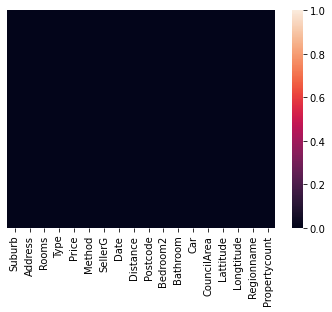

In [95]:
sns.heatmap(df1.isnull(), yticklabels=False)

In [ ]:
#new data sheet........................converting it into house_data.csv
df1.to_csv('New_Melbourne_housing_FULL.csv')